## **CASE STUDY**

### **STRATEGIC LENDING AND ACQUISITION ANALYSIS**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:

# Load loan disbursement and repayment data
data = pd.read_csv('data/loan.csv')
data.head()

,disb_date,tenure,loan_amount,loan_fee,date_time,amount,rep_month,repayment_type
0,19-Mar-24,14 days,360,43.2,27-JUN-24 07.16.36.000000000 AM,500.65,202406,Automatic
1,19-Mar-24,14 days,360,43.2,27-JUN-24 05.26.50.000000000 PM,2833.33,202406,Automatic
2,19-Mar-24,14 days,360,43.2,27-JUN-24 06.45.40.000000000 PM,143.98,202406,Automatic
3,19-Mar-24,14 days,360,43.2,27-JUN-24 01.24.57.000000000 PM,1000.00,202406,Automatic
4,19-Mar-24,14 days,360,43.2,27-JUN-24 01.31.44.000000000 PM,801.00,202406,Manual


In [21]:
# Convert date columns to datetime format
data['disb_date'] = pd.to_datetime(data['disb_date'], format='%d-%b-%y', errors='coerce')
data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce');

C:\Users\R\AppData\Local\Temp\ipykernel_11000\3828007454.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce');


In [22]:
# Extract month and year for analysis
data['disb_month'] = data['disb_date'].dt.to_period('M')
data['rep_month'] = pd.to_datetime(data['rep_month'], format='%Y%m', errors='coerce').dt.to_period('M')

In [23]:

# Assumptions for Forecasting
interest_rate = 0.15 / 12  # Monthly interest rate (assumed 15% annually)
operational_cost_ratio = 0.20  # 20% of the loan amount as operational cost
default_rate = 0.05  # 5% assumed default rate

In [24]:
# Calculate expected repayment amount per loan
data['expected_repayment'] = data['loan_amount'] * (1 + interest_rate * 1)  # Assuming 1-month repayment
data['operational_cost'] = data['loan_amount'] * operational_cost_ratio
data['default_loss'] = data['loan_amount'] * default_rate

data['profit'] = data['amount'] - (data['loan_amount'] + data['operational_cost'] + data['default_loss'])

In [25]:
# Aggregate data by disbursement month
monthly_forecast = data.groupby('disb_month').agg({
    'loan_amount': 'sum',
    'expected_repayment': 'sum',
    'operational_cost': 'sum',
    'default_loss': 'sum',
    'profit': 'sum'
}).tail(3)  # Last 3 months

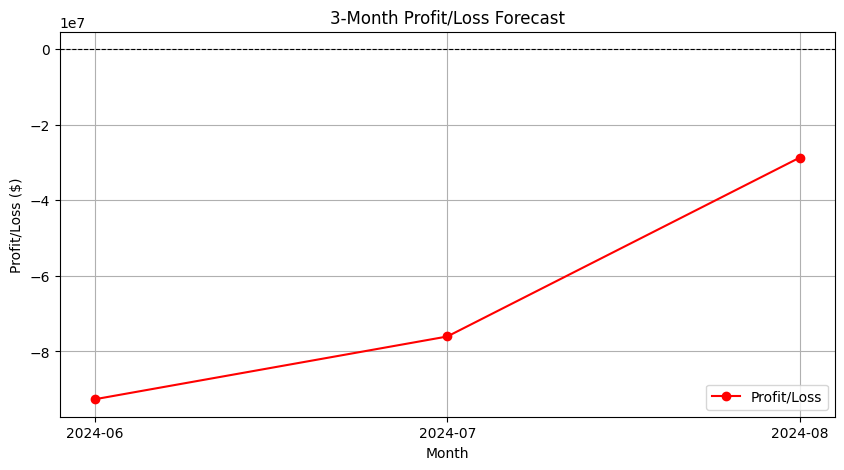

In [26]:
# Plot profit/loss trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_forecast.index.astype(str), monthly_forecast['profit'], marker='o', linestyle='-', color='red', label='Profit/Loss')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel("Month")
plt.ylabel("Profit/Loss ($)")
plt.title("3-Month Profit/Loss Forecast")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# Display forecast
display(monthly_forecast)


,loan_amount,expected_repayment,operational_cost,default_loss,profit
disb_month,,,,,
2024-06,108765082,1.101246e+08,21753016.4,5438254.10,-92652454.76
2024-07,92123405,9.327495e+07,18424681.0,4606170.25,-76046995.12
2024-08,34147772,3.457462e+07,6829554.4,1707388.60,-28716373.28
